# Lab: Random Variable ◓
In this lab, you will **catch Pokémon** in **simulations**, observing random variables and the Central Limit Theorem along the way. 

A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab Teaching Assistant, your Course Aides, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [ ]:
# Meet your CAs and TA if you haven't already!
# First name is enough, we'll know who they are! :)
ta_name = "Xiaocong"
ca1_name = "Shannon"
ca2_name = "Aishwarya"

# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# QOTD to Ask Your Group: "What's your favorite RSO on campus?"
partner1_name = "Eric"
partner1_netid = "ericrz2"
partner1_rso = ""

partner2_name = "John"
partner2_netid = "jvasi2"
partner2_rso = ""

partner3_name = ""
partner3_netid = ""
partner3_rso = ""

<hr style="color: #DD3403;">

# Part 1: Catching Pokémon
As stated earlier, we're going to catch some Pokémon! For those unfamiliar, Pokémon are creatures that can be captured (caught) to fight alongside their trainers in the mythical Pokémon world featured in countless video games, cartoons, and cards.

There are **tons** of Pokémon out there, so for the purposes of this lab, we will be dealing with Generation One (Gen. One) Pokémon. 

This means we will use a specific dataset that contains **Gen. One Pokémon** alongside some important statistics about the original 151. 

The "Gen One Pokemon Dataset" is available as `pokemon.csv`

Use Pandas to load this dataset into a DataFrame named `df`:

In [32]:
import pandas as pd
df = pd.read_csv("pokemon.csv")

### 🔬 Test Case Checkpoint 🔬

In [33]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(len(df) == 151), "This is not the dataset you're looking for. Check the URL."
assert("df" in vars()), "Make sure your DataFrame is named df."
assert("Dragon_Dmg" in df), "This is not the dataset you're looking for. Check the URL."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.1: Water Types
In the first Pokémon video game, the main objective is to beat gym leaders (experts in training a particular type of Pokémon) and obtain badges. Imagine you're pulling up to the Pewter City gym and want to beat Brock, the gym leader, to earn your first badge. Brock is an expert with rock-type Pokémon, and you know that water type Pokémon are effective against rock types. 

So, your main objective now is to **catch water type Pokémon**. 

Pokémon each have a **primary** and **secondary** type. In our DataFrame, `df`, we have these stored in the columns `Type1` (primary) and `Type2` (secondary).

Using the cell below, find the **number** of Pokémon whose **primary type** is water,  storing the **number of water pokemon** into the **integer** variable `waters`: 

In [34]:
waters = len(df[df.Type1 == "water"])
waters

28

Find the **probability** of catching a primary water-type Pokémon in a **single catch** using `waters`. You can assume it is **equally likely** to catch **any** of the Pokémon in the dataset. Store this value in the variable `prob_water`:

In [35]:
prob_water = waters / len(df)
prob_water

0.18543046357615894

Find the **probability** of catching two water-type Pokémon. You can assume it is **equally likely** to catch **any** of the Pokémon in the dataset and that you are drawing **with** replacement. Store this value in the variable `prob_two_waters`:

In [36]:
prob_two_waters = (waters / len(df)) ** 2
prob_two_waters

0.03438445682206921

### 🔬 Test Case Checkpoint 🔬

In [37]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math
assert( "waters" in vars() and "prob_water" in vars() ), "Double check your variable names. They should be 'waters' and 'prob_water'."
assert( waters**4 == 153664 * 4 ), "Your value for the number of primary water-types is incorrect."
assert( math.isclose(prob_water, 0.18543046357615894) ), "Your probability of catching a water type is incorrect."
assert( math.isclose(prob_two_waters, 0.03438445682206921) ), "Your probability of catching two water types in a row is incorrect. Think about how to calculate probability of compound events." 

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


This probability wasn't so difficult to find, but the math becomes **much more complex** if you consider that you're going to catch **multiple pokemon** without replacement. This is why you'll write a **function** that **simulates** the number of water-type Pokémon being caught. 

## Puzzle 1.2: Catching 10 Pokémon


You think you'll be ready to face the first gym after catching **ten Pokémon**. But you want to know how many water types you'll have. 

In the following cell, define a **function** `catch10` that will `return` the **number of Water Pokémon caught** after catching **ten Pokémon** with **replacement**. 


(*Hint*: In previous assignments, we have used `df.sample(n = 10)` in order to randomly select 10 rows from a DataFrame. But `df.sample(n = 10)` samples without replacement. Now that we want to sample 10 rows from the original DataFrame `df` with replacement, we can write `df.sample(n = 10, replace = True)` ).


In [40]:
def catch10() :
    caught = df.sample(n = 10, replace = True) 
    numwater = caught[caught['Type1'] == 'water']
    return len(numwater)
catch10()


4

### 🔬 Test Case Checkpoint 🔬

In [41]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
functions_list = [f.__name__ for f in globals().values() if type(f) == type(lambda *args: None)]
assert("catch10" in functions_list), "Ensure your function is named catch10()."
has1, has2, has3 = False, False, False
for i in range(1000):
    caught = catch10()
    assert(caught <= 10 and caught >= 0), "Double check the values you're returning in your catch10() function."
    if caught == 1: has1 = True
    elif caught == 2: has2 = True
    elif caught == 3: has3 = True 
assert(has1 == True), "Double check the values you're returning in your catch10() function."
assert(has2 == True), "Double check the values you're returning in your catch10() function."
assert(has3 == True), "Double check the values you're returning in your catch10() function."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle 1.3: Simulation
Now, using your `catch10` function from above, **write a simulation** to simulate the number of water Pokémon caught if you were to **repeat** these ten catches **1,000 times**.

Store your results in a DataFrame `df_water` with a column named `number_of_water`.

In [42]:
data = []
for i in range(1000) :
    catch = catch10()
    d = {'number_of_water' : catch}
    data.append(d)
df_water = pd.DataFrame(data)
df_water


,number_of_water
0,3
1,2
2,2
3,1
4,1
...,...
995,2
996,3
997,1
998,0


In [43]:
# check to see if your DataFrame looks correct by sampling 5 random rows from your df_water
df_water.sample(n = 5)

,number_of_water
599,3
485,0
555,1
649,2
559,4


### Analysis: Random Variable

Think about the simulation we just ran and answer the following questions:

- What is the random experiment corresponding to the simulation?
- What is the sample space corresponding to the random experiment?
- What is the random variable that we defined?
- What is the domain of the random variable?
 

The number of the water types caught when you go and catch 10 random pokemon is the random experiment corresponding to the simulation. As for the sample space, that would be all the pokemon that are returned in our data frame(s). The random variable being defined here are the number of pokemon we catch that end up being water types. Our domain would be 0 to 10. 

### 🔬 Test Case Checkpoint 🔬

In [44]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( "df_water" in vars() ), "Ensure your DataFrame for simulation results is named 'df_water'."
assert( len(df_water) == 1000 ), "Your simulation must have 1,000 observations."
assert( 'number_of_water' in df_water ), "Your simulation must have a column called `number_of_water`."
assert( math.isclose(df_water['number_of_water'].mean(), 1.85, abs_tol= 0.1) ), "Your simulation should have a mean value around 1.85. You may want to check if your Puzzle 1.2 function is correct."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle 1.4: Histogram 

Let's visualize our simulation results!

Use the `hist()` method to create a **frequency histogram** showing the number of water Pokémon caught in these ten catches. 

To make it look better, play with the number of bins by modifying the `bins` parameter in `df.hist(bins=...)`.

array([[<Axes: title={'center': 'number_of_water'}>]], dtype=object)

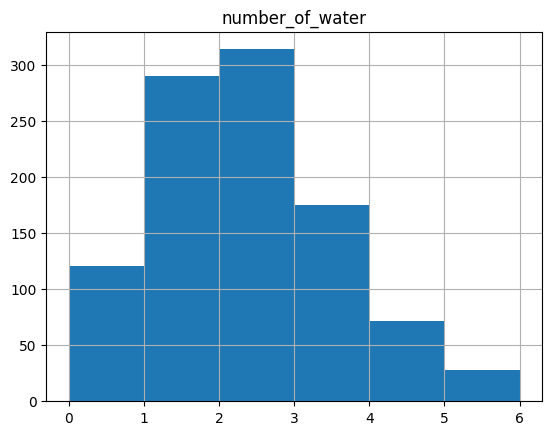

In [49]:
df_water.hist(bins = 6)



### Analysis: Expected Value

**Q2: What do you estimate to be the expected value for the number of water Pokémon caught in the first ten catches?**

Note: No need to use Python for this. Estimate using your Histogram. 

I estimate that within the first ten catches, we'll be expcted to catch around 2-3 water type pokemon.

<hr style="color: #DD3403;">

# Part 2: Secondary Types

###  Recap: Bernoulli Random Variables 
Remember from lecture that Bernoulli random variables come from an event with **two possible outcomes** that have **fixed probabilities**. They follow a **binomial distribution**. More information on this can be found at https://discovery.cs.illinois.edu/learn/Polling-Confidence-Intervals-and-Hypothesis-Testing/Bernoulli--Binomial-Random-Variables/. 

## Puzzle 2.1: Second Type Probability

Recall from earlier that Pokémon each have a **primary** and **secondary** type. In our DataFrame, `df`, we have these stored in the columns `Type1` (primary) and `Type2` (secondary).

An example of a Bernoulli variable can be whether or not a Pokemon has a **secondary type**. 

Using Python below, find the **number** of Gen. One Pokémon that **do not** have a secondary type, storing the result in the variable `no_secondary`. Note that when a Pokémon **does not** have a secondary type, the **value** in the `Type2` column of `df` is 'none'.

In [51]:
no_secondary = len(df[df.Type2 == 'none'])
no_secondary

89

Now, calculate the probability of any random Pokémon **having** a **secondary type**, storing the result in a variable `prob_secondary`:

In [55]:
prob_secondary = len(df[df.Type2 != 'none']) / len(df)
prob_secondary

0.4105960264900662

### 🔬 Test Case Checkpoint 🔬

In [56]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( "no_secondary" in vars() and "prob_secondary" in vars() ), "Double check your variable names. They should be 'no_secondary' and 'prob_secondary'."
assert( no_secondary**3 / 4 == 176242.25 ), "Your value for the number of Pokemon without a secondary type is incorrect."
assert( math.isclose(prob_secondary, 0.4105960264900662) ), "Your probability of a Pokemon having a secondary type is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.2: Calculating Expected Value

Refresh your memory on:
- Bernoulli Random Variables
- Binomial Random Variables


following this link: 
https://discovery.cs.illinois.edu/learn/Polling-Confidence-Intervals-and-Hypothesis-Testing/Bernoulli--Binomial-Random-Variables/

Q: Using the things you learned in lecture, answer to the following questions: 

Assume that we catch **5** pokemon independently at random  and we count **how many of them have a secondary type**.


- How many independent Bernoulli Variables do we have in our example? What do we consider as "success" for each Bernoulli variable?
- What is the probability of success of the Bernoulli random variables?
- What is the Binomial distribution in our example?
- What are the parameters of the binomial distribution in this example? 


In our example, we have whether or not they have a secondary type or not. A success would be if a pokemon had a secondary type and failure otherwise. The number of times we do this is our Binomial distribution in our example. Our parameters of the binomial distribution in this example was 5 times. 

Conveniently, we can easily calculate the **Expected Value** for Binomial Random Variables. For all binomial distributions $B(n, p)$ where $n$ is the number of trials and $p$ is the probability of success:

$EV = np$

Using your probability of success `prob_secondary` and the formula above, find the **expected value** for the number of Pokémon that **will have a secondary type** after $n = 5$ catches, storing the result in `secondary_ev`:

In [57]:
secondary_ev = 5 * prob_secondary
secondary_ev

2.052980132450331

### 🔬 Test Case Checkpoint 🔬

In [58]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( math.isclose(secondary_ev, 2.052980132450331) ), "Your expected value is incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.3: The Secondary Function

Now, define a function named `catch5()` that will `return` the **number of Pokémon with a secondary type** caught after **five catches with replacement**. 

Remember that checking for inequality is done using the `!=` operator. 

In [59]:
def catch5() :
    caught = df.sample(n = 5, replace = True) 
    gotsecondary = len(caught[caught.Type2 != 'none'])
    return gotsecondary
catch5()



1

### 🔬 Test Case Checkpoint 🔬

In [60]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
functions_list = [f.__name__ for f in globals().values() if type(f) == type(lambda *args: None)]
assert("catch5" in functions_list), "Ensure your function is named catch5()."
has1, has2, has3 = False, False, False
for i in range(1000):
    caught = catch5()
    assert(caught <= 5 and caught >= 0), "Double check the values you're returning in your catch5() function."
    if caught == 1: has1 = True
    elif caught == 2: has2 = True
    elif caught == 3: has3 = True 
assert(has1 == True), "Double check the values you're returning in your catch5() function."
assert(has2 == True), "Double check the values you're returning in your catch5() function."
assert(has3 == True), "Double check the values you're returning in your catch5() function."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle 2.4: Simulation, Again
Using a similar format to your solution for Puzzle 1.3, simulate the **number of Pokémon with a secondary type** caught if you were to repeat five catches **1000 times**.

Store your results in a DataFrame `df_secondary` with a column named `secondary`.

In [61]:
data = []
for i in range(1000) :
    catch = catch5()
    d = {'secondary' : catch}
    data.append(d)
df_secondary = pd.DataFrame(data)
df_secondary

,secondary
0,1
1,3
2,2
3,2
4,1
...,...
995,1
996,1
997,1
998,1


Find the mean of the column named `secondary` in the cell below: 

In [62]:
df_secondary['secondary'].mean()

2.003

### 🔬 Test Case Checkpoint 🔬

In [63]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( "df_secondary" in vars() ), "Ensure your DataFrame for simulation results is named 'df_secondary'."
assert( len(df_secondary) == 1000 ), "Your simulation must have 1,000 observations."
assert( 'secondary' in df_secondary ), "Your simulation must have a column called `secondary`."
assert( math.isclose(df_secondary['secondary'].mean(), 2.05, abs_tol= 0.1) ), "Your simulation should have a mean value close to the EV. Double check your catch5() function."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle 2.5: Histogram, Again

Let's visualize our simulation results again!

Use the `hist()` method to create a **probability histogram** showing the number of Pokémon caught with secondary types after five catches. 

To make it look great, play with the number of bins by modifying the `bins` parameter in `df.hist(bins=...)`.

array([[<Axes: title={'center': 'secondary'}>]], dtype=object)

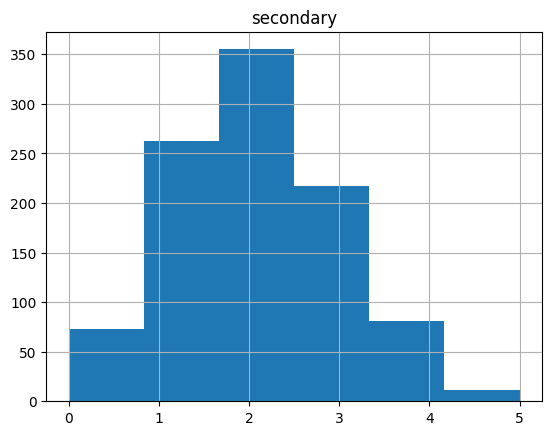

In [65]:
df_secondary.hist(bins = 6)

### Analysis: Calculation vs. Simulation

**Q3: Observe your histogram above. Does the simulated expected value of Pokemon with secondary types match with your calculation from Puzzle 2.2? How do you know?**

The simulared expected value of Pokemon with secondary types match with our calculation because both values are close to 2.

<hr style="color: #DD3403;">

# Part 3: Pokémon Stats and the Central Limit Theorem

You're an experienced Pokémon trainer now and would like to conduct some analysis on the given statistics of Pokémon.  

In this puzzle, we will observe the **Central Limit Theorem** in action through repeatedly catching Pokémon and observing their statistics. 

For context, our Pokémon dataset includes some vital statistics about Pokémon, such as their Health, in column `HP`.

## Puzzle 3.1: Catch_Average Function
First, define a function `catch_average` that will simulate catching `n` Pokémon at random, without replacement. 

This function will `return` the **average value** of the `column` statistic for these `n` Pokémon. 

For example, the `column` may be `HP`. In this case, your function should return the average `HP` for the `n` Pokémon caught.

A few pointers:
- This function takes **two parameters**, `column` and `n`. These values are **passed** to the function.
- The `.mean()` function may prove useful.
- **DO NOT** overthink the solution. Your function shouldn't be more than a few lines long at most. 

In [74]:
# Write your catch_average function: 
def catch_average(column, n) :
    av = df[column].sample(n = n, replace = False).mean()
    return av



### 🔬 Test Case Checkpoint 🔬

In [75]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
import math 
assert( catch_average("Number", 151) == 76 ), "Your catch_average function is not correctly defined."
assert( math.isclose(catch_average('HP', 151), 64.21192052980132)), "Your catch_average function is not correctly defined."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



### The Distribution of HP

Observe the **distribution** of the `HP` column our  DataFrame by running `df.hist()` on the `HP` column.

<Axes: >

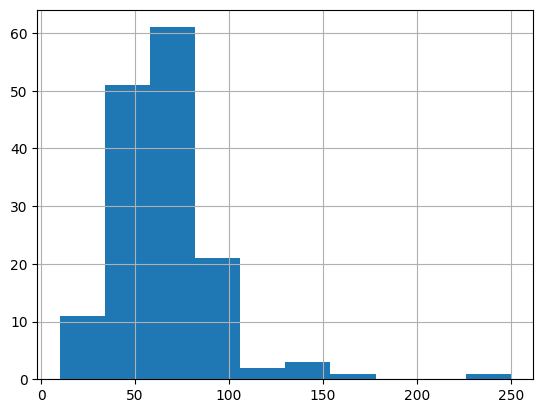

In [77]:
df['HP'].hist()

As we can see, this distribution is **far from normal**. This makes sense: Pokémon have varying HP. Keep this in mind as we move forward.

## Puzzle 3.2: Catch 5
#### This puzzle and the next few consist of **multiple steps**. *Read carefully*.

Use your `catch_average` function, simulate **1000 instances** of **catching 5 Pokémon** and calculating the average of the `HP` column.

In other words, pass the values of **"HP"** and **5** to `catch_average`, in that order. 

Store the results in a DataFrame `df_5` with the column name `avg_hp`. 

Finally, generate a **histogram** of your `df_5` with **20 bins**. 

In [78]:
data = []
for i in range(1000) :
    ca = catch_average('HP', 5)
    d = {'avg_hp' : ca}
    data.append(d)
df_5 = pd.DataFrame(data)
df_5

,avg_hp
0,61.2
1,74.2
2,104.0
3,55.2
4,54.0
...,...
995,70.8
996,51.0
997,58.8
998,67.2


## Puzzle 3.3: Catch 10

Use your `catch_average` function, simulate **1000 instances** of **catching 10 Pokémon** calculating the average of the `HP` column.

Store the results in a DataFrame `df_10` with the column name `avg_hp`. 

Finally, generate a **histogram** of your `df_10` with **10 bins**. 

array([[<Axes: title={'center': 'avg_hp'}>]], dtype=object)

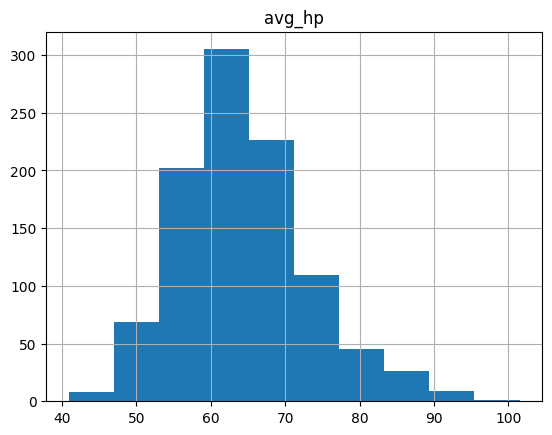

In [79]:
data = []
for i in range(1000) :
    ca = catch_average('HP', 10)
    d = {'avg_hp' : ca}
    data.append(d)
df_10 = pd.DataFrame(data)
df_10
df_10.hist(bins = 10)

## Puzzle 3.4: Catch 50
Use your `catch_average` function, simulate **1000 instances** of **catching 50 Pokémon** calculating the average of the `HP` column.

Store the results in a DataFrame `df_50` with the column name `avg_hp`. 

Finally, generate a **histogram** of your `df_50` with **10 bins**. 

array([[<Axes: title={'center': 'avg_hp'}>]], dtype=object)

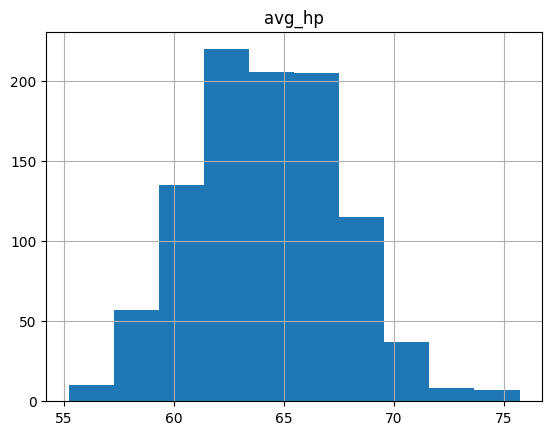

In [80]:
data = []
for i in range(1000) :
    ca = catch_average('HP', 50)
    d = {'avg_hp' : ca}
    data.append(d)
df_50 = pd.DataFrame(data)
df_50
df_50.hist(bins = 10)

### 🔬 Test Case Checkpoint 🔬

In [81]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert( (63 <= df_5.mean()).bool() & (df_5.mean() <= 65).bool() ), "The Catch 5 simulation is not correct!"
assert( (63 <= df_10.mean()).bool() & (df_10.mean() <= 65).bool() ), "The Catch 10 simulation is not correct!"
assert( (63 <= df_50.mean()).bool() & (df_50.mean() <= 65).bool() ), "The Catch 50 simulation is not correct!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: Histograms

**Q4: What do you notice about the histograms of `avg_hp` as we increase the sample size `n` (our number of catches for `catch_average`)?**

As we increase the sample size n, the historgrams slowly approach a normal curve/ normal distribution.

## Puzzle 3.5: Another Statistic

Choose one of the following numerical statistics about Pokémon included in our DataFrame (**NOT** HP). Your options are:
- Capture rate, stored in column `Capt_Rate`
- Attack, stored in column `Attack`
- Defense, stored in column `Defense`
- Special, stored in column `Special` 
- Speed, stored in column `Speed`

Now, check the **distribution** of this new statistic across our Pokémon dataset using `df[column].hist()`: 

<Axes: >

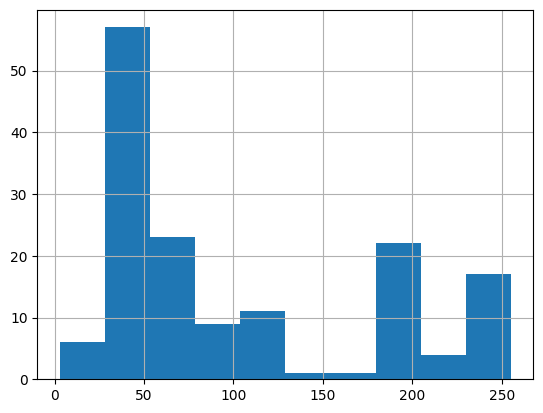

In [84]:
df['Capt_Rate'].hist()

Again, **not a normal distribution**. 

## Puzzle 3.6: Catch 50, Part Two
Now, using your `catch_average` function, simulate **1000 instances** of **catching 50 Pokémon** calculating the average of the column **you chose** from Puzzle 3.5 above.

Store the results in a DataFrame `catch_50` with the column name `avg_[your column]`. 

Finally, generate a **histogram** of your `catch_50` with **10 bins**. 

array([[<Axes: title={'center': 'avg_hp'}>]], dtype=object)

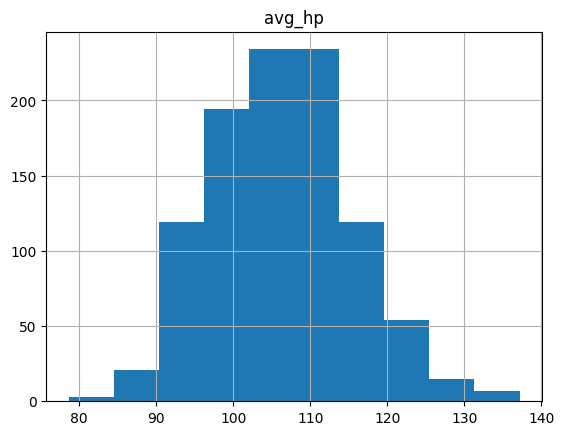

In [85]:
data = []
for i in range(1000) :
    ca = catch_average('Capt_Rate', 50)
    d = {'avg_hp' : ca}
    data.append(d)
catch_50 = pd.DataFrame(data)
catch_50.hist(bins = 10)

### Analysis: Applications

**Q5: Just now, you have observed the *Central Limit Theorem* at work for your chosen column. What could be some applications of the Central Limit Theorem  in real world problems? Write at least three sentences.**

I think an application of the Central Limit Theorem in real world problems/scenarios would be in medical studies. In studies, researchers probably apply the CLT to make analysis of patient data and see if their treatments that they are currently researching are of any goood or not. Using the CLT would allow them to draw more accurate conclusions about their current treatments/research.

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)

<hr style="color: #DD3403;">

Author's Note: The dataset for this lab was adapted from an open-source dataset found on **Kaggle**: https://www.kaggle.com/datasets/dizzypanda/gen-1-pokemon. 

If you're ever curious and looking for a set of data about a hobby that you have, try searching for it on Kaggle!